# Data Preprocessing

In [2]:
# import libraries
import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import torch
from transformers import pipeline

In [3]:
# load data
import pandas as pd

# Load the dataset
df = pd.read_csv('combined_cleaned_twitter_data.csv')  # Adjust the file path as necessary

In [4]:
# remove noise
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    text = text.strip()  # Remove leading/trailing whitespace
    return text

df['clean_content'] = df['text'].apply(clean_text)

In [5]:
# Tokenization
from nltk.tokenize import word_tokenize
import nltk

# Download the punkt tokenizer
nltk.download('punkt')

df['tokens'] = df['clean_content'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IMRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Remove stopwords
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)

# get bahasa indonesia stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_id = set(stopwords.words('indonesian'))

def remove_stopwords_id(tokens):
    return [word for word in tokens if word.lower() not in stop_words_id]

df['tokens'] = df['tokens'].apply(remove_stopwords_id)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IMRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IMRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Ensure Data Quality
# Remove empty tokens
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token])

# Optionally, remove stopwords (if required)
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))  # Use 'english' for English texts

df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IMRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

# Download the WordNet lemmatizer
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['tokens'] = df['tokens'].apply(lemmatize)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IMRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Review the Cleaned Data
df.head()

,id,timestamp,text,searchQuery,clean_content,tokens
0,1844183629653737485,2024-10-10 01:10:00+00:00,selagi gak masuk indonesia mah bodo amat.\nber...,speed Indonesia,selagi gak masuk indonesia mah bodo amat\nbera...,"[selagi, gak, masuk, indonesia, mah, bodo, ber..."
1,1844171042832646341,2024-10-10 00:20:00+00:00,Gak sabar nunggu update selanjutnya tentang ak...,speed Indonesia,Gak sabar nunggu update selanjutnya tentang ak...,"[Gak, sabar, nunggu, update, aktivitas, Speed,..."
2,1844034407159701602,2024-10-09 15:17:00+00:00,การ์ดน้องหนาว จากอัลบั้ม aespa 에스파 The 5th Min...,speed Indonesia,aespa The th Mini AlbumWhiplash \n\n Beat Ver...,"[aespa, th, Mini, AlbumWhiplash, Beat, Ver, Sp..."
3,1844128223300551170,2024-10-09 21:30:00+00:00,speed indonesia,speed Indonesia,speed indonesia,"[speed, indonesia]"
4,1844122745422159957,2024-10-09 21:08:00+00:00,Gue banget yang ikutin perjalanan Speed di Ind...,speed Indonesia,Gue banget yang ikutin perjalanan Speed di Ind...,"[Gue, banget, ikutin, perjalanan, Speed, Indon..."


In [10]:
# Initialize the Sentiment Classifier
# Initialize the sentiment analysis pipeline
sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
C:\ProgramData\anaconda3\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [11]:
# Perform Sentiment Analysis
# Perform sentiment analysis on the first 5 rows
df['sentiment'] = df['clean_content'].apply(lambda x: sentiment_classifier(x)[0])

In [12]:
# Extract the sentiment label
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])

# Extract the sentiment score
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])


TypeError: list indices must be integers or slices, not str

In [13]:
# Classify Sentiment
def classify_sentiment(text):
    results = sentiment_classifier(text)
    # Extract the sentiment with the highest score
    sentiment = max(results[0], key=lambda x: x['score'])
    return sentiment['label'], sentiment['score']

# Apply sentiment classification to the 'clean_content' column
df[['sentiment_label', 'sentiment_score']] = df['clean_content'].apply(classify_sentiment).apply(pd.Series)

In [14]:
# Review the Results
df.head()

,id,timestamp,text,searchQuery,clean_content,tokens,sentiment,sentiment_label,sentiment_score
0,1844183629653737485,2024-10-10 01:10:00+00:00,selagi gak masuk indonesia mah bodo amat.\nber...,speed Indonesia,selagi gak masuk indonesia mah bodo amat\nbera...,"[selagi, gak, masuk, indonesia, mah, bodo, ber...","[{'label': 'positive', 'score': 0.198922902345...",negative,0.674750
1,1844171042832646341,2024-10-10 00:20:00+00:00,Gak sabar nunggu update selanjutnya tentang ak...,speed Indonesia,Gak sabar nunggu update selanjutnya tentang ak...,"[Gak, sabar, nunggu, update, aktivitas, Speed,...","[{'label': 'positive', 'score': 0.102577842772...",negative,0.818184
2,1844034407159701602,2024-10-09 15:17:00+00:00,การ์ดน้องหนาว จากอัลบั้ม aespa 에스파 The 5th Min...,speed Indonesia,aespa The th Mini AlbumWhiplash \n\n Beat Ver...,"[aespa, th, Mini, AlbumWhiplash, Beat, Ver, Sp...","[{'label': 'positive', 'score': 0.675740599632...",positive,0.675741
3,1844128223300551170,2024-10-09 21:30:00+00:00,speed indonesia,speed Indonesia,speed indonesia,"[speed, indonesia]","[{'label': 'positive', 'score': 0.660719275474...",positive,0.660719
4,1844122745422159957,2024-10-09 21:08:00+00:00,Gue banget yang ikutin perjalanan Speed di Ind...,speed Indonesia,Gue banget yang ikutin perjalanan Speed di Ind...,"[Gue, banget, ikutin, perjalanan, Speed, Indon...","[{'label': 'positive', 'score': 0.858708798885...",positive,0.858709


In [15]:
# Save the def classify_sentiment df to a new CSV file
df.to_csv('sentiments.csv', index=False)

# Data Analysis

In [16]:
# all sentiments statistics
df['sentiment_label'].value_counts()


sentiment_label
positive    861
negative    446
neutral      17
Name: count, dtype: int64

In [20]:
# all sentiments statistics
df['sentiment_label'].value_counts(normalize=True)

sentiment_label
positive    0.650302
negative    0.336858
neutral     0.012840
Name: proportion, dtype: float64

# Data Visualization

In [22]:
import plotly.express as px
import wordcloud

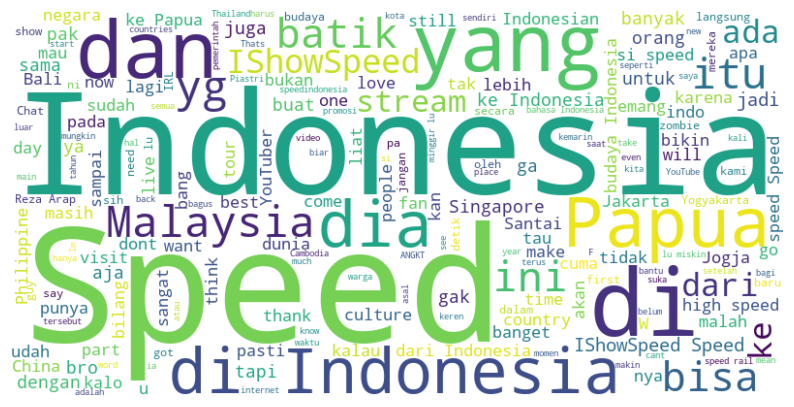

In [23]:
# Plot the Word Cloud
# Create a word cloud
wordcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_content']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# Save the word cloud as an image
wordcloud.to_file('wordcloud.png')

In [36]:
# Sentiment Distribution
sentiment_counts = df['sentiment_label'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title='Sentiment Distribution')
fig.show()

In [37]:
# save the sentiment distribution as an image
fig.write_image('sentiment_distribution.png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


# Sentiment Trend Over Time

In [29]:
# Trend Analysis by Date using plotly
df['timestamp'] = pd.to_datetime(df['timestamp'])
sentiment_trend = df.groupby(['timestamp', 'sentiment_label']).size().reset_index()
sentiment_trend.columns = ['Date', 'Sentiment', 'Count']

fig = px.line(sentiment_trend, x='Date', y='Count', color='Sentiment', title='Sentiment Trend Over Time')
fig.show()


In [31]:
# Average Sentiment Score Over Time
sentiment_score_trend = df.groupby('timestamp')['sentiment_score'].mean().reset_index()

fig = px.line(sentiment_score_trend, x='timestamp', y='sentiment_score', title='Average Sentiment Score Over Time')
fig.show()


In [32]:
# analyze the sentiment score
df['sentiment_score'].describe()


count    1324.000000
mean        0.598872
std         0.149250
min         0.351017
25%         0.483608
50%         0.570188
75%         0.689002
max         0.981235
Name: sentiment_score, dtype: float64